<a href="https://colab.research.google.com/github/David6230/Proyeccion_ventas/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


# Análisis de la base de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [ ]:
# Análisis de duplicados

df.duplicated().sum()

0

In [ ]:
# Análisis de valores categoricos

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [ ]:
df.value_counts()

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score
female  group A         associate's degree           free/reduced  none                     41          49             51               1
male    group C         high school                  free/reduced  none                     51          57             44               1
                        bachelor's degree            standard      none                     70          49             53               1
                                                                                            73          67             73               1
                                                                                            74          61             68               1
                                                                                                                                       ..
female  group D         bachelor's degr

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

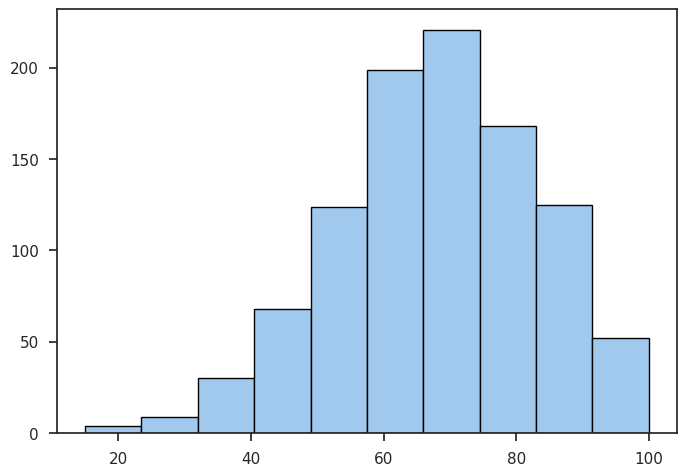

In [69]:
# Histograma de la variable a predecir

sns.set()
sns.set_style("white")
sns.set(style = "ticks")
sns.set_color_codes()
df["math score"].hist(bins=10, edgecolor = "black", color = "#a1c9ed")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)

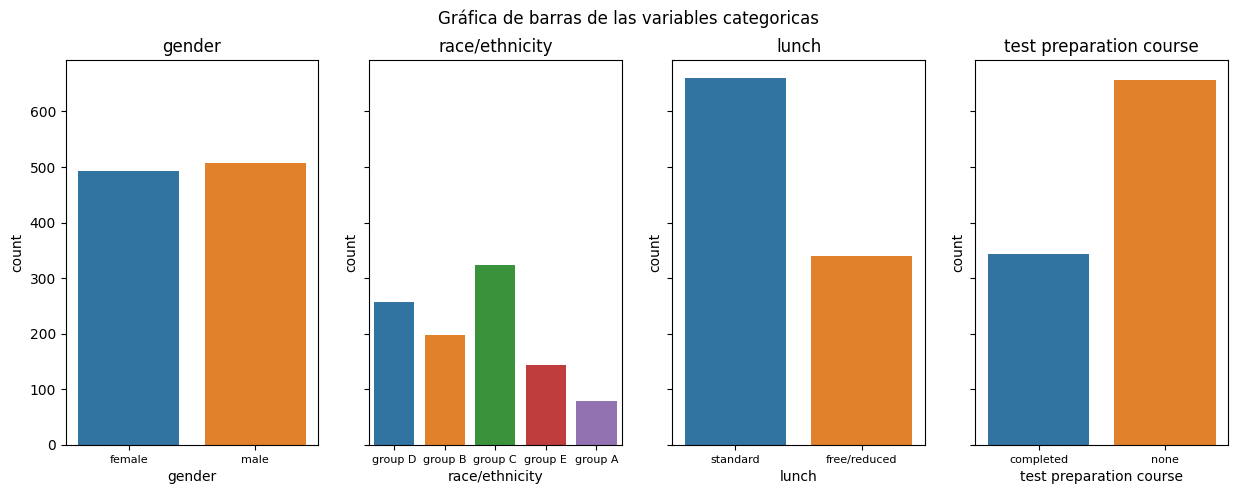

In [ ]:
# Línea de código tomada de Kagle pero modificada para los fines pertinentes.

dt1 = ["gender","race/ethnicity","lunch","test preparation course"]

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Gráfica de barras de las variables categoricas')
column =0

for col in dt1:
    sns.countplot(ax=axes[column], x=col, data=df)
    axes[column].set_title(col)
    axes[column].tick_params(axis='x', labelsize=8)
    column +=1

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Count plot for categorical variables')
column =0 
for col in cat_cols:
    sns.countplot(ax=axes[column], x=col, data=df)
    axes[column].set_title(col)
    column += 1

Text(0.5, 1.0, 'Diagrama de cajas para las puntuaciones de matemáticas, lectura y escritura')

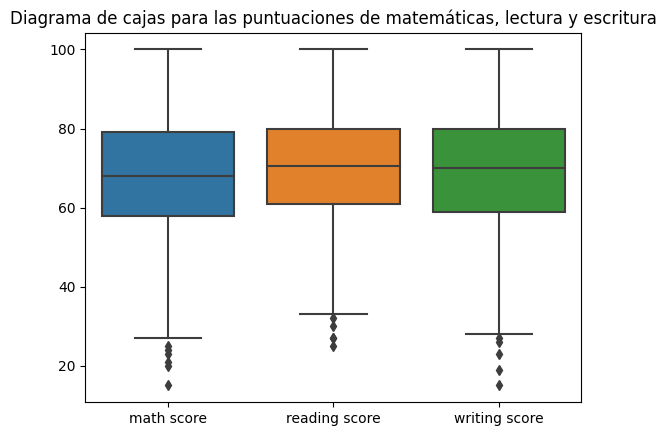

In [ ]:
# Identificar valores atipicos en las calificaciones
sns.boxplot(data=df[["math score", "reading score", "writing score"]])
plt.title("Diagrama de cajas para las puntuaciones de matemáticas, lectura y escritura")

Se puede observar que para todas las notas, existen valores atípicos, es decir valores con puntuaciones muy bajas.

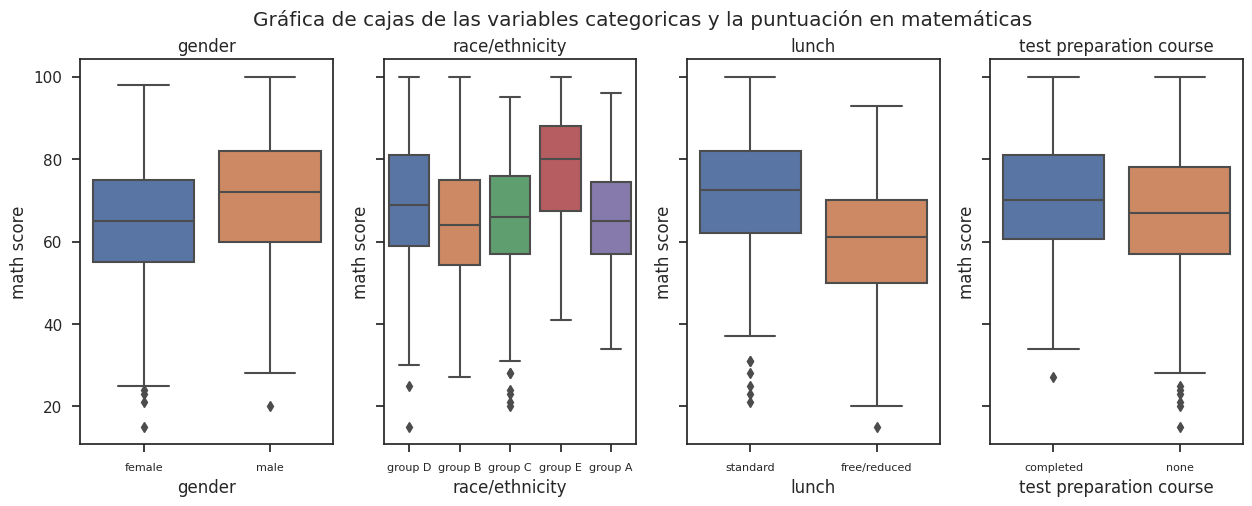

In [ ]:
# Identificar valores atipicos en las calificaciones de matematicas y las variables categóricas
# Línea de código tomada de Kagle pero modificada para los fines pertinentes.

dt1 = ["gender","race/ethnicity","lunch","test preparation course"]

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Gráfica de cajas de las variables categoricas y la puntuación en matemáticas')
column =0

for col in dt1:
    sns.boxplot(ax=axes[column], data=df, x=col, y='math score')
    axes[column].set_title(col)
    axes[column].tick_params(axis='x', labelsize=8),
    notch = True,
    widths = .7,
    patch_artist=True,
    medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
    boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
    column += 1



Se puede observar que la media de notas de matemáticas en las mujeres es más baja que la de los hombres.

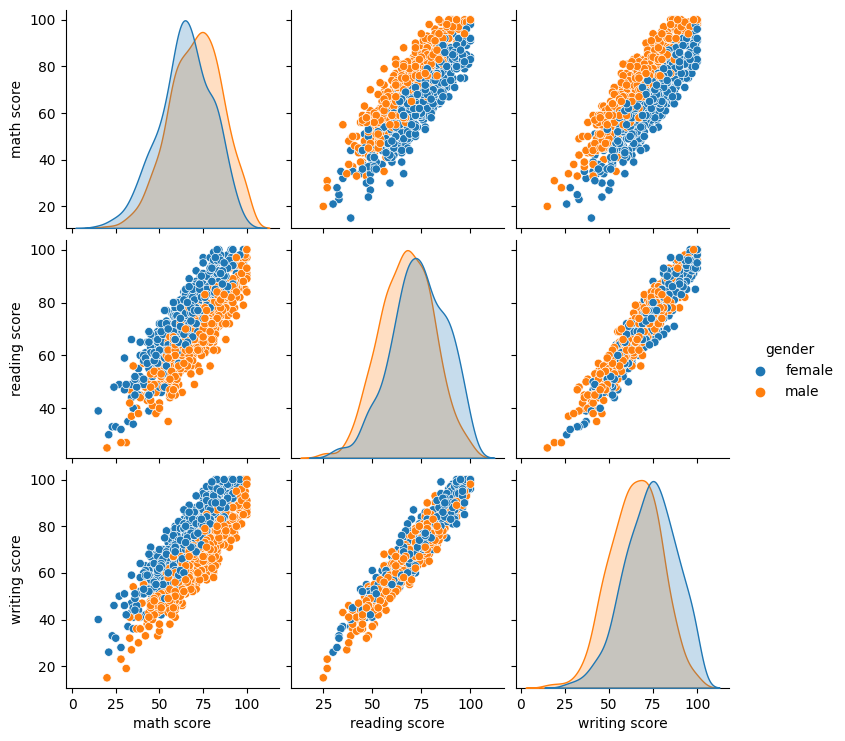

In [ ]:
# Relacion nota en matematicas y la preparación

sns.pairplot(df, hue="gender", height = 2.5)

Se puede observar que existe una relación positiva entre las notas.

<Axes: >

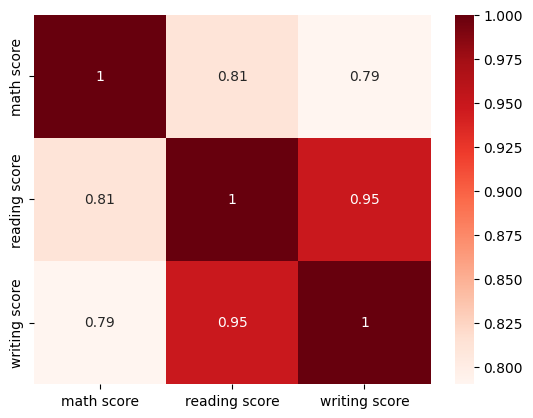

In [ ]:
# Mapa de correlación
corr = df.corr()
corr
sns.heatmap(corr, cmap = "Reds", annot=True)

Como se pudo evidenciar anteriormente, existe una relación postiva y fuerte entre las diferentes notas.

Los pasos que se realizaron para el análisis y limpieza de la base de datos fueron:

1.- Análisis de duplicados
2.- Análisis de missings values
3.- Consistencia de las variables categóricas.